In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv(r"C:\Users\prasa\Downloads\crcCASc.csv")
df.head()



,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,MURDER OF SCs,45,60,33,39,37,52,46,48,35,43,64,54
1,ARUNACHAL PRADESH,MURDER OF SCs,0,0,0,0,1,0,0,0,0,0,0,0
2,ASSAM,MURDER OF SCs,0,3,8,0,21,5,11,9,0,0,0,0
3,BIHAR,MURDER OF SCs,28,33,9,14,12,16,26,46,22,24,29,27
4,CHHATTISGARH,MURDER OF SCs,8,11,12,25,6,10,11,7,11,8,2,6


In [32]:
print(df.columns)

Index(['STATE/UT', 'CRIME HEAD', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012'],
      dtype='object')


In [12]:
# Reshape from wide to long format
df_long = df.melt(id_vars=["STATE/UT", "CRIME HEAD"],
                  var_name="Year",
                  value_name="Crime_Count")

# Rename columns for easier access
df_long.rename(columns={"STATE/UT": "State", "CRIME HEAD": "Crime_Type"}, inplace=True)

# Convert Year and Crime_Count to numeric
df_long["Year"] = df_long["Year"].astype(int)
df_long["Crime_Count"] = pd.to_numeric(df_long["Crime_Count"], errors='coerce')

# Check the result
print(df_long.head())


               State     Crime_Type  Year  Crime_Count
0     ANDHRA PRADESH  MURDER OF SCs  2001           45
1  ARUNACHAL PRADESH  MURDER OF SCs  2001            0
2              ASSAM  MURDER OF SCs  2001            0
3              BIHAR  MURDER OF SCs  2001           28
4       CHHATTISGARH  MURDER OF SCs  2001            8


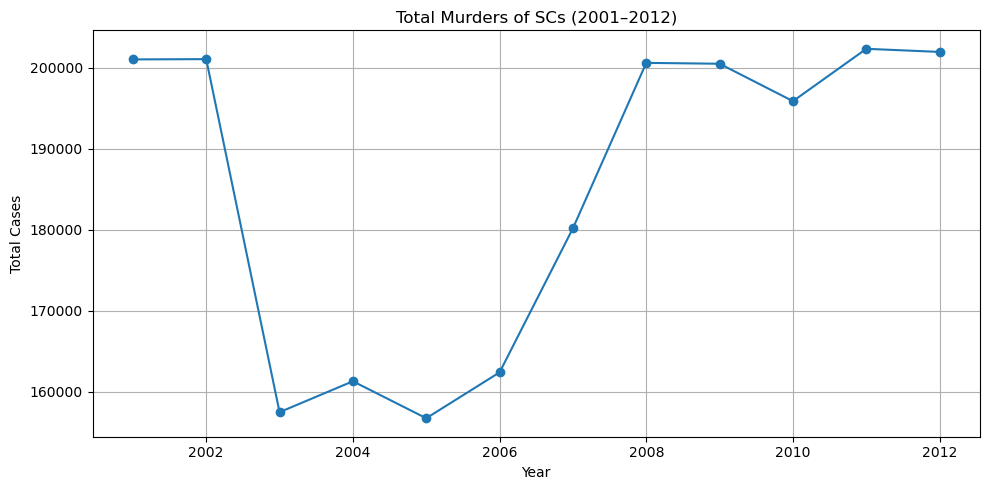

In [13]:
import matplotlib.pyplot as plt

# Total crimes per year
df_yearly = df_long.groupby("Year")["Crime_Count"].sum()

plt.figure(figsize=(10, 5))
df_yearly.plot(marker='o')
plt.title("Total Murders of SCs (2001–2012)")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


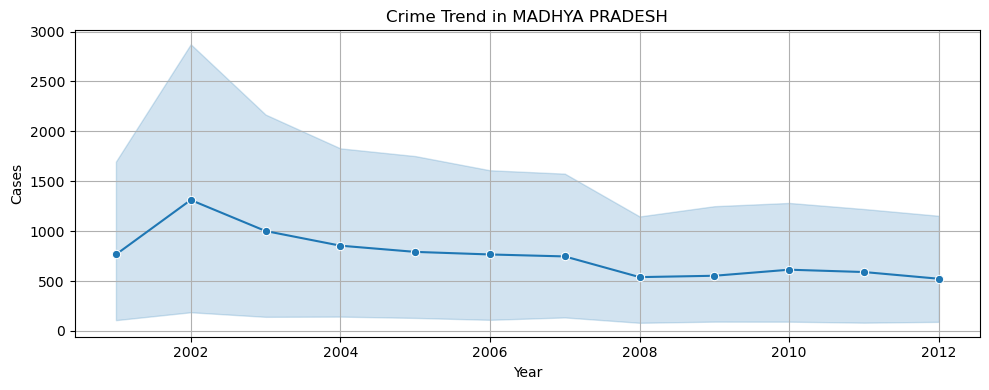

In [14]:
import seaborn as sns

# Example: Crime trend in Madhya Pradesh
state_focus = "MADHYA PRADESH"
df_state = df_long[df_long["State"] == state_focus]

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_state, x="Year", y="Crime_Count", marker='o')
plt.title(f"Crime Trend in {state_focus}")
plt.ylabel("Cases")
plt.grid(True)
plt.tight_layout()
plt.show()
